# 5 - Ridge Regression

**Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.**

**It is used to analyze multivariate regression data. The aim is to find the coefficients that minimize the sum of squares error by applying a penalty to these coefficients.**

**Ridge Regression works by appliyng a penalizing term (reducing weights and biases) to overcome overfitting.**

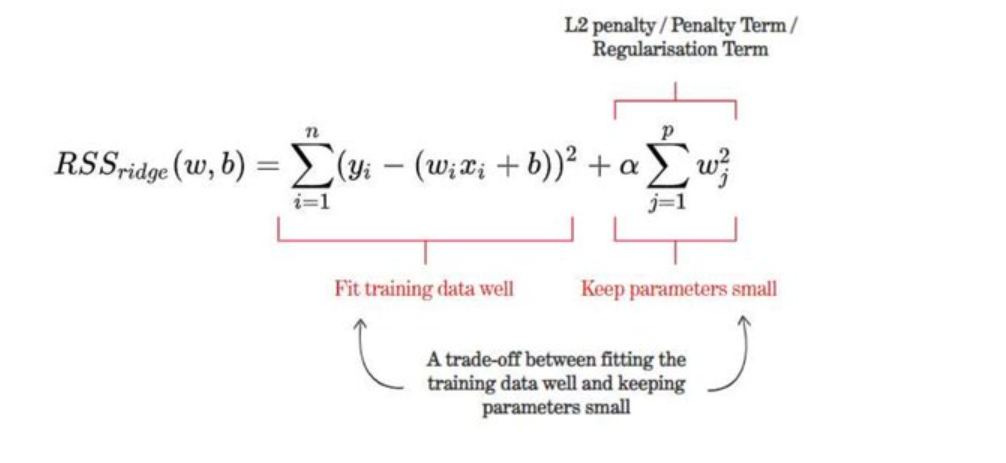

# What is variance and bias ?

**The variance would specify the amount of variation in the prediction if the different training data was used. In simple words, variance tells that how much a random variable is different from its expected value. Ideally, a model should not vary too much from one training dataset to another, which means the algorithm should be good in understanding the hidden mapping between inputs and output variables. Variance errors are either of low variance or high variance.**

**Low variance means there is a small variation in the prediction of the target function with changes in the training data set. At the same time, High variance shows a large variation in the prediction of the target function with changes in the training dataset.**

**Usually, nonlinear algorithms have a lot of flexibility to fit the model, have high variance.**

**BIAS : amount of assumptions the model makes

**Bias refers to the difference between predicted values and actual values. Variance says about how much a random variable deviates from its expected value.**

**If High Variance,predicted values deviates from actual values,OVERFITTING happens.**

**Low variance means there is a small variation in the prediction of the target function with changes in the training data set. At the same time, High variance shows a large variation in the prediction of the target function with changes in the training dataset.**

**Ways to Reduce High Variance:**

    - Reduce the input features or number of parameters as a model is overfitted.
    
    - Do not use a much complex model.
    
    - Increase the training data.
    
    - Increase the Regularization term.

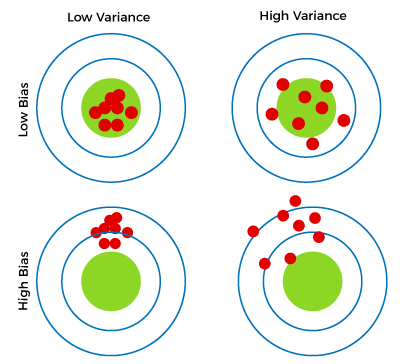

**Low-Bias, Low-Variance:
The combination of low bias and low variance shows an ideal machine learning model. However, it is not possible practically.**

**Low-Bias, High-Variance: With low bias and high variance, model predictions are inconsistent and accurate on average. This case occurs when the model learns with a large number of parameters and hence leads to an overfitting**

**High-Bias, Low-Variance: With High bias and low variance, predictions are consistent but inaccurate on average. This case occurs when a model does not learn well with the training dataset or uses few numbers of the parameter. It leads to underfitting problems in the model.**

**High-Bias, High-Variance:
With high bias and high variance, predictions are inconsistent and also inaccurate on average.**

# Get dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Hitters.csv")
data = df.copy()
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Check null values
data.isnull().values.any()

True

In [4]:
# Clear null values
data = data.dropna()
data.isnull().values.any()

False

# Create Dummy Variables

In [5]:
dummies = pd.get_dummies(data[["League","Division","NewLeague"]])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
y = data["Salary"]

X_pre = data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_pre,dummies[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


# Split train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 19)
(210,)
(53, 19)
(53,)


# Import model

In [10]:
from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha=0.2).fit(X_train,y_train)  # alpha = lambda on the formula


In [11]:
ridgeModel.coef_

array([  -2.1304544 ,    7.90396299,    1.19240598,   -1.89141604,
         -2.00931258,    6.82499605,   -7.64022609,   -0.20806741,
          0.16073602,    0.49680028,    1.60407146,    0.96476381,
         -0.94387464,    0.25916208,    0.35902774,   -4.63022562,
         60.62807867, -101.32762746,  -33.09220187])

# Prediction

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = ridgeModel.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"MSE Test Loss = {mse}")
print(f"RMSE Test Loss = {rmse}")

MSE Test Loss = 77900.95055897879
RMSE Test Loss = 279.1074175993515


In [15]:
# Plot random lambda values
lambda_values = 10**np.linspace(10,-1,100)*0.5

ridgeModel = Ridge()
coefficients = []

for i in lambda_values:
    ridgeModel.set_params(alpha=i)
    ridgeModel.fit(X_train,y_train)
    coefficients.append(ridgeModel.coef_)


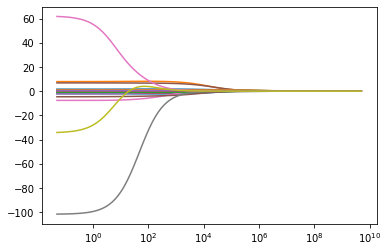

In [18]:
plt.plot(lambda_values,coefficients)
plt.xscale("log")

# Model Tuning

In [21]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(alphas = lambda_values,scoring = "neg_mean_squared_error",normalize = True)
ridgeCV.fit(X_train,y_train)

print(f"Optimum lambda value = {ridgeCV.alpha_}")

Optimum lambda value = 0.05


# Tuned Model

In [22]:
ridgeTuned = Ridge(alpha=ridgeCV.alpha_).fit(X_train,y_train)

# Prediction with tuned model
y_pred_tuned = ridgeTuned.predict(X_test)

mse_tuned = mean_squared_error(y_test,y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"MSE Tuned Loss = {mse_tuned}")
print(f"RMSE Tuned Loss = {rmse_tuned}")

MSE Tuned Loss = 77886.74539470045
RMSE Tuned Loss = 279.0819689530308
